In [38]:
import sounddevice as sd
import acoular
import pylab as plt

# from os import path
# import pylab as plt
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

Fs = 44100

blocksize = 128
npt = blocksize * 256
dur = npt/Fs

# Process audio data, read and then into FFT
ts = acoular.TimeSamples( name = 'audio16channels.h5' )
ps = acoular.PowerSpectra ( time_data=ts, block_size=blocksize, window='Rectangular' )

# Create the scene: a grid to work on and mic positions
rg = acoular.RectGrid( x_min=-0.1, x_max=0.1, y_min=-0.1, y_max=0.1, z=0.3, increment = 0.1 )
micgeofile = 'uma16array.xml'
print(f"Using microphone file {micgeofile}")
mg = acoular.MicGeom( from_file=micgeofile )

# Prepare Beamformer
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
print("Ready")

Using microphone file uma16array.xml
Ready


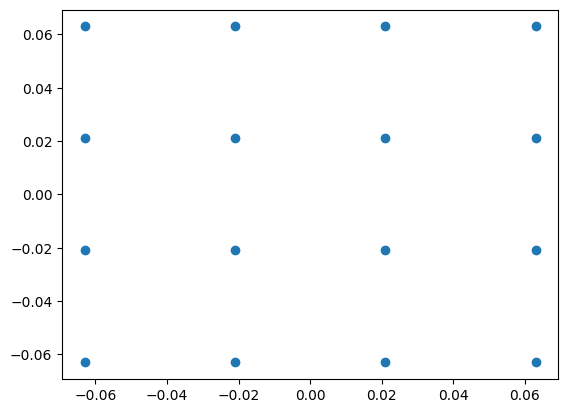

In [43]:
# Check: Plot microphone layout
plt.ion()
plt.plot(mg.mpos[0], mg.mpos[1], 'o');

In [ ]:
# Check: Test read from TimeSamples device with n-blocks
def test_read():
    # ts.numsamples = 1024
    i = 0
    b = 0
    for smp in ts.result(128):
        i+=len(smp)
        b += 1
        # print(smp)
    print("Testread done, %i rows in %i blocks" % (i, b))
# test_read()

Done


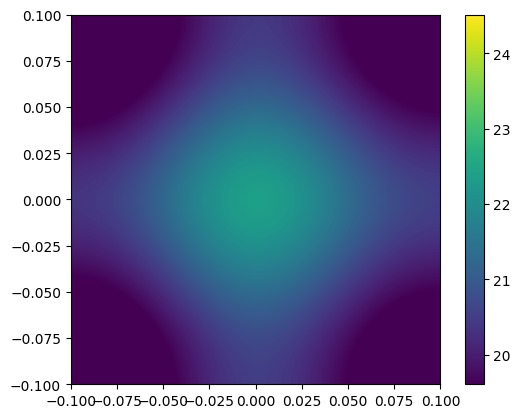

In [46]:
freq = 3000
fwidth = 1
vmin = 80
vmax = 100

pm = bb.synthetic( freq, fwidth )
lm = acoular.L_p( pm )

plt.imshow( lm.T, origin='lower', vmin=lm.max()*vmin/100, vmax=lm.max()*vmax/100, extent=rg.extend(), interpolation='bicubic')
plt.colorbar()
print('Done')

In [41]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.figure()
@interact(vmin=widgets.IntSlider(min=50, max=100, step=1, value=50),
          vmax=widgets.IntSlider(min=50, max=100, step=1, value=100),
          freq=widgets.IntSlider(min=100, max=22100, step=100, value=2000),
          fwidth=widgets.IntSlider(min=0, max=5, step=1, value=3) )
def plot(vmin, vmax, freq, fwidth):
    pm = bb.synthetic( freq, fwidth )
    lm = acoular.L_p( pm )

    plt.imshow( lm.T, origin='lower', vmin=lm.max()*vmin/100, vmax=lm.max()*vmax/100, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=50, description='vmin', min=50), IntSlider(value=100, description='vmax'…